In [2]:
import pandas as pd 
import numpy as np

In [3]:
poki=pd.read_csv('Pokemon.csv')

In [4]:
poki.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
poki=poki.iloc[:,1:]

In [6]:
poki.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
poki['Type 2']=poki['Type 2'].fillna('None')

Q1. How many pokemon are from the 5th generation?

a. 178

b. 168

c. 150

d. 170

In [8]:
#how many pokemons are from 5th genration
poki[poki['Generation']==5].shape

(165, 12)

In [9]:
#165 pokemon are from the 5th generation

Q2. How many pokemon have the highest defense score?

a. 10

b. 7

c. 3

d. 2

In [10]:
#How many pokemons are having highest defence score
poki[poki['Defense']==poki['Defense'].max()].shape

(3, 12)

In [11]:
#3 pokemon have the highest defence score 

Q3. How you will be handling missing values in this dataset:

a. Fill up the null values with the median.

b. Fill up the null values with standard deviation.

c. Fill up the null values with the mean.

d. Fill up the null values with None.

In [12]:
#fill up the nul values with None.

Q4. Which columns are not having any kind of relationship with the generation
column?

a. Attack

b. Speed

c. Both of the above

d. None of the above

In [13]:
poki.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [14]:
#both of the above have no significant relationship with the generation column. 

Q5. Which of the following model is the best fit for predicting the legendary of the pokemon based on the below parameters:

1. Handle the missing values.

2. Split the dataset into a 70:30 ratio with random_state as 1.

a. Linear Regression

b. Logistic Regression

c. Decision Tree Model

d. Random Forest Model

In [21]:
poki.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


### **Label Encoding**
It  refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [22]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
poki['Name']=label_encoder.fit_transform(poki['Name'])
poki['Type 1']=label_encoder.fit_transform(poki['Type 1'])
poki['Type 2']=label_encoder.fit_transform(poki['Type 2'])

In [23]:
#random forest model 

X = poki.drop(columns=['Legendary'])  # Independent Variables
y = poki['Legendary']                 # Dependent Variables/ target column
print(X.shape)    # Check the shape of the X variables
print(y.shape)    # Check the shape of Y Variables



(800, 11)
(800,)


In [24]:
from sklearn.model_selection import train_test_split  # For selection the model and Split the data
from sklearn import tree  # For Decision Tree
from sklearn.metrics import accuracy_score,confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
print(x_train.shape)
print(x_test.shape)

(560, 11)
(240, 11)


In [25]:
clf = tree.DecisionTreeClassifier()   #Create the model for Decision tree classifier.
clf.fit(x_train,y_train) 

DecisionTreeClassifier()

Q6. What is the precision of the Decision Tree model when the target is False?

a. 0.90 to 0.1

b. 0.80 to 0.90

c. 1.0 to 2.0

d. 0.50 to 0.60

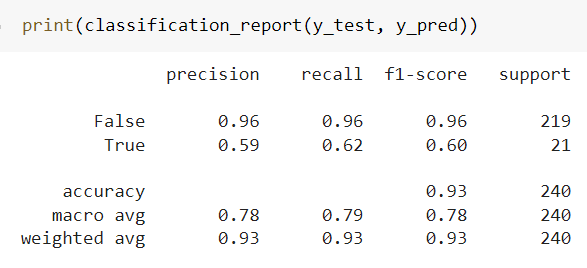

In [ ]:
#a - 0.90 - 1.0 i.e 0.96

Q7. What is the sensitivity of the above model when the target is True?

a. 0.90 to 1.0

b. 0.50 to 0.60

c. 0.60 to 0.70

d. 0.30 to 0.40

In [ ]:
#true positive rate, or the recall is the sensitivity of the model when the target is true i.e - 0.62

Q8. How much miss-classified data has been retrieved from the above model?

a. Between 15 to 20

b. Between 7 to 10

c. Between 30 to 45

d. Between 50 to 70

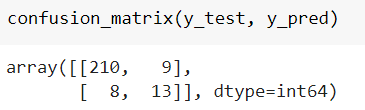

In [ ]:
#missclassified data == FP + FN = 9+8 = 17. 
#between 15-20. 

Q9. Decision tree models might create some biased trees if some classes
dominate. From the below options which action is best to take so that it won't
create biased trees:

a. balance the dataset prior to fitting

b. imbalance the dataset prior to fitting

c. balance the dataset after fitting

d. None of the above

In [ ]:
#balance the dataset after fitting 

Q10.Suppose, you have to work with an ML problem, where you have to predict
the number of oxygen tanks needed to be shipped from Indonesia. Which of
the following ML algorithm you will choose:

a. Logistic regression

b. Decision Tree

c. Both of the above

d. None of the above

In [ ]:
#Decision Tree

Q11.Which of the following is true for the Decision Tree?

a. The model can able to generate understandable rules

b. The model can able to handle both continuous and categorical
variables

c. It can able to perform classification without requiring much computation

d. All of the above

In [ ]:
#all of the above. 

Q12.The total gain is computed by adding the expected value of each outcome
and deducting the costs associated with the decision.

a. True

b. False

In [ ]:
#True

Q13.How we can avoid the overfitting in Decision Tree

a. Stopping the Tree Growth

b. Pruning the Full Grown Tree

c. Both of above

d. None of the Above

In [ ]:
#both of the above. 